<a href="https://colab.research.google.com/github/nayyabRz/MEC_20S19832/blob/main/Waste_management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d techsash/waste-classification-data

100% 426M/427M [00:21<00:00, 22.1MB/s]
100% 427M/427M [00:21<00:00, 21.1MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/waste-classification-data.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/DATASET/TRAIN',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/DATASET/TEST',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 22564 files belonging to 2 classes.
Found 2513 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
706/706 [==============================] - 72s 97ms/step - loss: 1.4716 - accuracy: 0.7631 - val_loss: 0.3254 - val_accuracy: 0.8782
Epoch 2/10
706/706 [==============================] - 69s 96ms/step - loss: 0.4161 - accuracy: 0.8306 - val_loss: 0.4054 - val_accuracy: 0.7819
Epoch 3/10
706/706 [==============================] - 68s 96ms/step - loss: 0.3709 - accuracy: 0.8513 - val_loss: 0.2941 - val_accuracy: 0.8890
Epoch 4/10
706/706 [==============================] - 68s 95ms/step - loss: 0.3616 - accuracy: 0.8562 - val_loss: 0.2679 - val_accuracy: 0.8965
Epoch 5/10
706/706 [==============================] - 70s 98ms/step - loss: 0.3351 - accuracy: 0.8634 - val_loss: 0.2650 - val_accuracy: 0.9017
Epoch 6/10
706/706 [==============================] - 69s 98ms/step - loss: 0.3193 - accuracy: 0.8745 - val_loss: 0.2892 - val_accuracy: 0.8874
Epoch 7/10
706/706 [==============================] - 69s 98ms/step - loss: 0.2832 - accuracy: 0.8883 - val_loss: 0.2461 - val_accuracy:

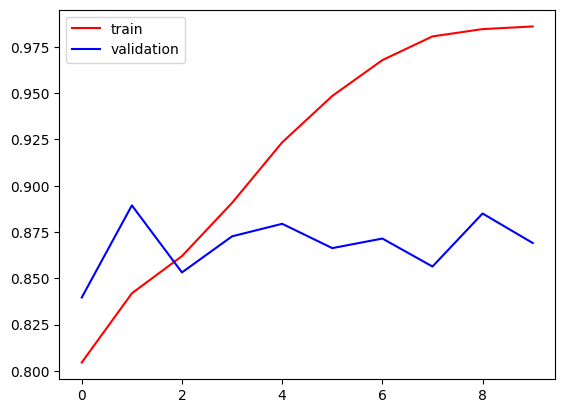

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

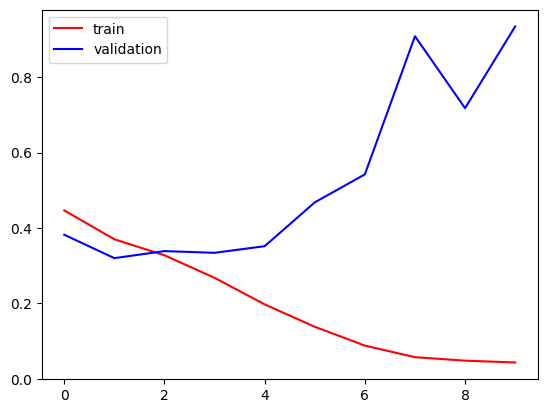

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

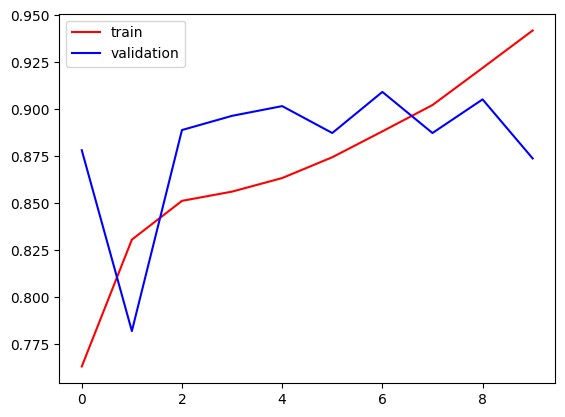

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

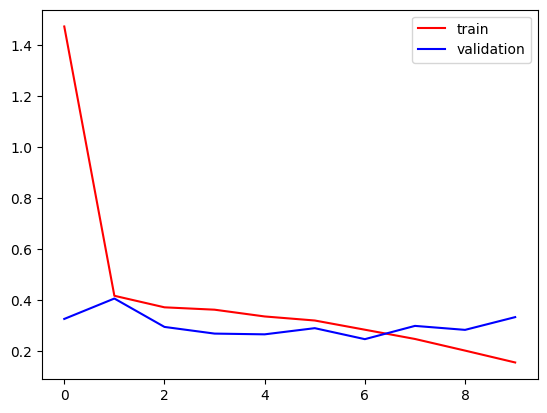

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

**Creating a pretrained model**

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d techsash/waste-classification-data

 99% 424M/427M [00:19<00:00, 24.1MB/s]
100% 427M/427M [00:19<00:00, 22.9MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/waste-classification-data.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [ ]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
conv_base.trainable = False

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/DATASET/TEST',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/DATASET/TRAIN',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

Found 2513 files belonging to 2 classes.
Found 22564 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
79/79 [==============================] - 101s 1s/step - loss: 0.2570 - accuracy: 0.9005 - val_loss: 0.6682 - val_accuracy: 0.7357
Epoch 2/10
79/79 [==============================] - 56s 709ms/step - loss: 0.1039 - accuracy: 0.9626 - val_loss: 0.8350 - val_accuracy: 0.7274
Epoch 3/10
79/79 [==============================] - 88s 1s/step - loss: 0.0493 - accuracy: 0.9841 - val_loss: 0.9367 - val_accuracy: 0.7295
Epoch 4/10
79/79 [==============================] - 56s 708ms/step - loss: 0.0246 - accuracy: 0.9964 - val_loss: 1.2071 - val_accuracy: 0.7181
Epoch 5/10
79/79 [==============================] - 56s 707ms/step - loss: 0.0174 - accuracy: 0.9964 - val_loss: 1.1851 - val_accuracy: 0.7391
Epoch 6/10
79/79 [==============================] - 88s 1s/step - loss: 0.0078 - accuracy: 0.9992 - val_loss: 1.3103 - val_accuracy: 0.7338
Epoch 7/10
79/79 [==============================] - 56s 710ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 1.3733 - val_accuracy: 0.7340
Epoch 8

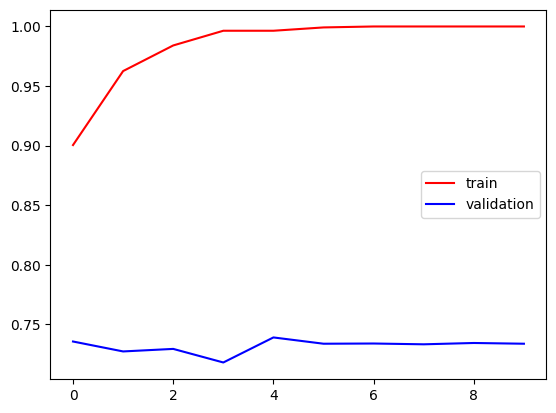

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

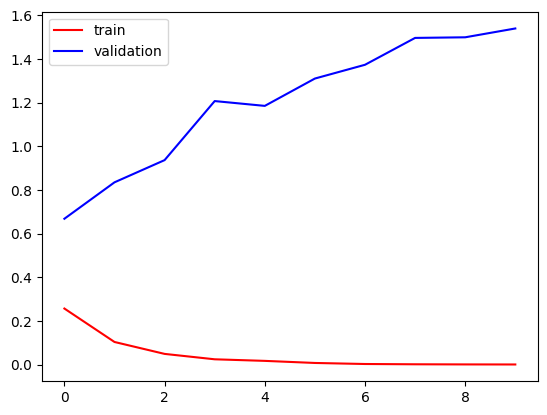

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()